# Lab 2 (Part A) - Introduction to gradient descent

This part of the Lab is a step by step introduction to the gradient descent algorithm. It will help you understand how it works. Make sure that you check the videos of lecture 2 before starting this Lab:
- Introduction to Linear Regression: https://www.youtube.com/watch?v=-wmjwMWRsZU&list=PLS8J_PRPtGfdnPf9QqT7Itnn2rAHsoWqY&index=3
- Introduction to Nonlinear Regression: https://www.youtube.com/watch?v=Hyu8QMLEHrE&list=PLS8J_PRPtGfdnPf9QqT7Itnn2rAHsoWqY&index=4

First, please select the Python code cell below and run it to initialize some plots. You DO NOT have to understand the code in this cell.

In [1]:
# Always run this cell before anything else. DO NOT modify this code.
%matplotlib inline

import sys
sys.path.insert(0, 'labutils/')

from lab2utils import lab2partA1, lab2partA2
lab2A1, lab2A2 = lab2partA1(), lab2partA2()

# 1. Minimizing a function of one parameter with gradient descent

In this section, you are given a function $F(a) = (a + 5)^2$ of one parameter $a$ (a scalar value). The goal is to minimize the function $F$ using the gradient descent algorithm.

You are asked to read and complete the Python code below to perform gradient descent (read carefully the code, the comments, and the *TODO* comments in red). The function `dF(a)` that you should complete corresponds to $\frac{\partial F(a)}{\partial a}$, i.e., the derivative of the function $F(a)$ with respect to the parameter $a$.

If your implementation of gradient descent is correct and the value of $\alpha$ is correctly choosen, then the value of $a$ should approach $-5$ and the value of $F(a)$ should approach $0$. This is because the minimum of the function $F(a)$ is $0$ when $a = -5$.

Once your code works well, you can re-run it with different values of the learning rate $\alpha$ and see the difference in terms of the number of iterations it takes until convergence. For example, you can try the following values for $\alpha$: 0.01, 0.3, and 0.9. Please note that if your learning rate $\alpha$ is too large (e.g. $\alpha = 1.5$ for this example), then $F(a)$ can **diverge** and *blow up*, resulting in values which are too large for computer calculations. If your value of $F(a)$ increases or even blows up, stop the execution, adjust your learning rate and try again.

You can also re-run the code with a different initial value for the parameter $a$. For example, you can try an initial value of $a = 0$ or $a = -15$.

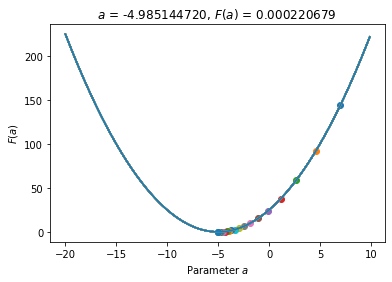

In [2]:
import numpy as np
from sympy import *

# DO NOT modify the definition of the function F(a)
def F(a):
    return (a + 5)**2


""" TODO:
Write here the definition of the function `dF(a)`, which is
the derivative of `F(a)` with respect to the parameter `a`
"""
def dF(a):
    placeholder_a = Symbol('a')
    f = lambdify(placeholder_a, F(placeholder_a).diff(placeholder_a))
    return f(a)


alpha = 0.1            # The learning rate of gradient descent
a = 7                  # The initial value of a (any initial value is ok)
max_iterations = 100   # Maximum number of iterations to perform
epsilon = 0.0001       # Some small number to test for convergence (i.e. to stop if F(a) does not decrease too much)
# print(dF(a))
# print(F(a))          # Making sure derivative is correct
for itr in range(max_iterations):
    lab2A1.plot(itr, F, a) # This plots an animation (DO NOT modify this line)
    prev = F(a) # Save the value of F(a)
    
    
    """ TODO:
    Write here the gradient descent step to update the value  of the parameter a.
    Hint: You need to use `alpha` and `dF(a)`.
    """
    a = a-alpha*dF(a)
    """ TODO:
    Replace the boolean variable `CONDITION` below with a condition to break-out
    of the loop if we are close to convergence. Hint: You need to use `prev` (the 
    previous value of F(a)), the current value of `F(a)` (after a has been updated), and `epsilon`.
    """
    CONDITION = True # Replace True with a boolean condition
    if abs(prev-F(a)) < epsilon:
        break


# 2. Minimizing a function of two parameters with gradient descent

In this section, you are given a function $F(a, b) = 5 + a^2 + \frac{3}{2} b^2 + a b~$ of two parameters $a$ and $b$ (scalar values). The goal is to minimize the function $F(a, b)$ using the gradient descent algorithm.

You are asked to read and complete the Python code below to perform gradient descent (read carefully the code, the comments, and the *TODO* comments in red). The first function `dFa(a, b)` that you should complete corresponds to $\frac{\partial F(a, b)}{\partial a}$, i.e., the derivative of the function $F(a, b)$ with respect to the first parameter $a$. The second function `dFb(a, b)` that you should complete corresponds to $\frac{\partial F(a, b)}{\partial b}$, i.e., the derivative of the function $F(a, b)$ with respect to the second parameter $b$.

Note that $\frac{\partial F(a, b)}{\partial a} = 2 a + b$, and $\frac{\partial F(a, b)}{\partial b} = 3 b + a$.

If your implementation is correct and the value of $\alpha$ is correctly chosen, then the value of both $a$ and $b$ should approach $0$ and the value of $F(a, b)$ should approach $5$. This is because the minimum of the function $F(a, b)$ is $5$ when $a = 0$ and $b = 0$.

Once your code works well, you can re-run it with different values of the learning rate $\alpha$, and different values of the initial parameters $a$ and $b$.

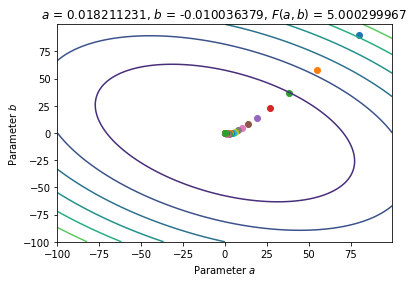

In [3]:
# DO NOT modify the definition of the function F(a, b)
def F(a, b):
    return 5 + a**2 + 1.5 * b**2 + a * b


""" TODO:
Write here the definition of the function dFa(a, b), which is
the derivative of F(a, b) with respect to the first parameter a
"""
def dFa(a, b):
    p_a = Symbol('a')
    p_b = Symbol('b')
    gradient = lambdify([p_a, p_b], F(p_a, p_b).diff(p_a))
    return gradient(a,b)


""" TODO:
Write here the definition of the function dFb(a, b), which is
the derivative of F(a, b) with respect to the second parameter b
"""
def dFb(a, b):
    p_a = Symbol('a')
    p_b = Symbol('b')
    gradient = lambdify([p_a, p_b], F(p_a, p_b).diff(p_b))
    return gradient(a,b)


alpha = 0.1            # The learning rate of gradient descent
a, b = 80, 90          # The initial values of a and b (any initial values are ok)
max_iterations = 100   # Maximum number of iterations
epsilon = 0.0001       # Some small number to test for convergence (i.e. to stop if F(a) does not decrease too much)
# print(dFa(a,b))
# print(dFb(a,b))      # both derivaties work
for itr in range(max_iterations):
    lab2A2.plot(itr, F, a, b) # This plots an animation (DO NOT modify this line)
    prev = F(a, b) # Save the value of F(a, b)
    
    
    """ TODO:
    Write here the gradient descent step to update the value of parameters `a` and `b` simultaneously.
    Hint: You need to use `alpha`, `dFa(a, b)` and `dFb(a, b)`
    """
    a = a - alpha * dFa(a,b)
    b = b - alpha * dFb(a,b)
      
    """ TODO:
    Replace the boolean variable `CONDITION` below with a condition to break-out
    of the loop if we are close to convergence. You need to use `prev` the previous value of
    F(a, b), the current value of `F(a, b)`, and `epsilon`.
    """
    CONDITION = True # Replace True with a boolean condition
    if abs(prev-F(a,b) < epsilon):
        break
        

# 3. Minimizing a function of multiple parameters with gradient descent

This section is similar to the previous one, but you will minimize a function of multiple parameters (i.e., a vector of $p$ parameters: $\theta \in \mathbb{R}^p$).

First, you are asked to write the function $F(\theta)$ in the following Python code. The function $F(\theta)$ is defined as:
$$F(\theta) = \sum_{j} \theta_j^2$$

The gradient of the function $F(\theta)$ is denoted as $\nabla F(\theta)$. This is a vector containing the derivative of $F(\theta)$ with respect to each parameter $\theta_j$:
$$\nabla F(\theta) = \left ( \frac{\partial F(\theta)}{\partial \theta_0}, \frac{\partial F(\theta)}{\partial \theta_1}, \frac{\partial F(\theta)}{\partial \theta_2}, \dots \right )$$ 

Write the definition of the function `gradF(theta)` in the following Python code. This function corresponds to $\nabla F(\theta)$. It should return an array containing the derivative of $F(\theta)$ with respect to each parameter $\theta_j$.

If your implementation is correct and the value of $\alpha$ is correctly chosen, then you should end up getting all parameter values close to $0$ and the value of $F(\theta)$ should approach $0$. This is because the minimum of the function $F(\theta)$ is $0$ when $\theta = \vec{0} $ (the null vector).

Once your code works well, you can re-run it with a different value of the learning rate $\alpha$, and a different initial parameters vector $\theta$.

iteration = 0, theta = [ 80  90 -20], F(theta) = 14900
iteration = 1, theta = [ 64.  72. -16.], F(theta) = 9536.0
iteration = 2, theta = [ 51.2  57.6 -12.8], F(theta) = 6103.040000000001
iteration = 3, theta = [ 40.96  46.08 -10.24], F(theta) = 3905.9455999999996
iteration = 4, theta = [32.768 36.864 -8.192], F(theta) = 2499.805184
iteration = 5, theta = [26.2144 29.4912 -6.5536], F(theta) = 1599.8753177600001
iteration = 6, theta = [20.97152 23.59296 -5.24288], F(theta) = 1023.9202033664
iteration = 7, theta = [16.777216 18.874368 -4.194304], F(theta) = 655.3089301544961
iteration = 8, theta = [13.4217728 15.0994944 -3.3554432], F(theta) = 419.3977152988775
iteration = 9, theta = [10.73741824 12.07959552 -2.68435456], F(theta) = 268.41453779128153
iteration = 10, theta = [ 8.58993459  9.66367642 -2.14748365], F(theta) = 171.78530418642018
iteration = 11, theta = [ 6.87194767  7.73094113 -1.71798692], F(theta) = 109.94259467930893
iteration = 12, theta = [ 5.49755814  6.18475291 -1.374

/var/folders/nn/fsqh4pp547v34jxkkmj_6s7m0000gn/T/ipykernel_34281/1677537449.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


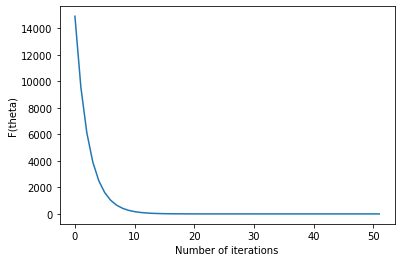

In [2]:
import numpy as np, matplotlib.pylab as plt

""" TODO:
Write here the definition of the function `F(theta)`, where `theta` is an array of parameters.
"""
def F(theta):
    return sum([x**2 for x in theta])


""" TODO:
Write here the definition of the function `gradF(theta)`, the gradient of F(theta).
This function should return an array where the j'th value of this array is the 
derivative of F(theta) with respect to the j'th parameter theta_j.
"""
def gradF(theta):
    return theta*2


alpha = 0.1                      # The learning rate of gradient descent
theta = np.array([80, 90, -20])  # Some initial parameters vector: theta = [theta_0, theta_1, theta_2, ...]
max_iterations = 100             # Maximum number of iterations
epsilon = 0.000001               # Some small number to test for convergence (i.e. to stop if F(a) does not decrease too much)
# print(F(theta))
# print(gradF(theta))
historical_iterations = []
historical_theta_values = []
for itr in range(max_iterations):
    prev = F(theta)
    print("iteration = {}, theta = {}, F(theta) = {}".format(itr, theta, prev))
    historical_iterations.append(itr)
    historical_theta_values.append(prev)
    
    """ TODO:
    Write here the gradient descent step to update the parameters vector `theta`.
    All the parameter values in theta should be updated simultaneously.
    Hint: You need to use `alpha` and `gradF(theta)`
    """
    theta = theta - alpha * gradF(theta)
    
    
    """ TODO:
    Replace the boolean variable `CONDITION` below with a condition to break-out
    of the loop if we are close to convergence. Hint: You need to use `prev` the 
    previous value of F(theta), the current value of `F(theta)`, and `epsilon`.
    """
    CONDITION = True # Replace True with a boolean condition
    if abs( prev-F(theta) < epsilon ):
        break


""" TODO:
Produce a plot here showing the value of F(theta) at each iteration.
You might need to modify the above code to save all the historical values of F(theta)
Note: you can use ax.plot(...) to do this plot
"""
fig, ax = plt.subplots()
# Plot here the number of iterations vs. the history of values of F(theta)
ax.set_xlabel("Number of iterations")
ax.set_ylabel("F(theta)")
# print(historical_iterations)
# print(historical_theta_values)
ax.plot(historical_iterations, historical_theta_values)
fig.show()

# 4. Minimizing a function using Tensorflow

Now that you understand how to minimize a function with gradient descent, let's see how to do the same thing in a much easier way.

Suppose that we want again to minimize a function $F(\theta)$ with respect to the parameters $\theta$ (i.e. we want to find the parameters vector $\theta$ that gives us the minimum possible value of $F(\theta)$). To do this, we can use Tensorflow to apply gradient descent in a very easy way, without manually computing the gradient $\nabla F(\theta)$. Indeed, Tensorflow takes care of automatically computing the gradient and applying a gradient descent step for us. The only thing we need to do is simply to implement the function $F(\theta)$ using Tensorflow.

The following code shows how to do this using the same example function $F(\theta)$ defined as:
$$F(\theta) = \sum_{j} \theta_j^2$$

In [36]:
""" First we need to import Tensorflow """
import tensorflow as tf


""" We implement the function F(theta) using Tensorflow """
def F(theta):
    theta_squared = tf.pow(theta, 2)    # Each parameter value theta[j] is squared
    return tf.reduce_sum(theta_squared) # The sum of the values in theta_squared


""" We define and initialize the parameters vector theta as follows """
theta = tf.Variable([80, 90, -20], dtype=tf.float32)


""" We minimize F(theta) using gradient descent (SGD) with a 
    learning rate of alpha=0.1, and 500 iterations (steps) """
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
for itr in range(500):
    optimizer.minimize(lambda: F(theta), var_list=[theta]) # Applies gradient descent step

print("theta = ", theta.numpy())

theta =  [ 5.642151e-38  5.077937e-38 -5.380775e-38]


In the above code, the function $F(\theta)$ that we want to minimize is defined using Tensorflow (in this example, using `tf.pow(.)` and `tf.reduce_sum(.)`). Then, we just apply gradient descent steps iteratively using `optimizer.minimize(lambda: F(theta), var_list=[theta])`. The second argument of `optimizer.minimize(..)` is a list that contains the parameters vector we want to optimize (in this example: `[theta]`); and the first argument is simply the function that we want to minimize (in this case `lambda: F(theta)`).

Note that gradient descent (`tf.keras.optimizers.SGD(.)`) is not the only optimizer available in Tensorflow. There exist multiple other optimizers with different properties (such as `tf.keras.optimizers.Adam(.)` etc.).